# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-16 04:22:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   161MB/s    in 0.6s    

2023-04-16 04:22:18 (161 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 16 04:22 .
drwxr-xr-x 1 root root 4096 Apr 16 04:22 ..
drwxr-xr-x 4 root root 4096 Apr 16 04:22 test
drwxr-xr-x 4 root root 4096 Apr 16 04:22 train


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy  as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['77677.jpg']
Image shape: (512, 384, 3)


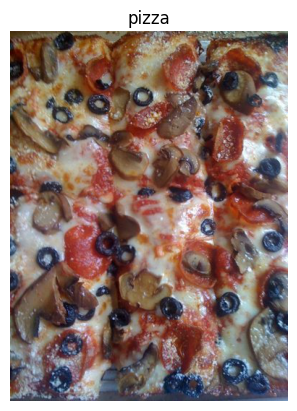

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 65,  44,  15],
        [ 67,  46,  17],
        [ 68,  47,  20],
        ...,
        [131, 148, 130],
        [127, 144, 128],
        [124, 141, 125]],

       [[ 66,  45,  14],
        [ 67,  46,  15],
        [ 68,  47,  18],
        ...,
        [127, 141, 126],
        [123, 140, 124],
        [120, 137, 121]],

       [[ 67,  47,  12],
        [ 68,  48,  15],
        [ 69,  49,  16],
        ...,
        [ 93, 107,  94],
        [ 93, 107,  94],
        [ 91, 105,  92]],

       ...,

       [[ 78,  81,  88],
        [ 66,  70,  79],
        [ 63,  70,  80],
        ...,
        [107, 129, 166],
        [106, 130, 168],
        [107, 131, 169]],

       [[ 56,  60,  69],
        [ 49,  56,  64],
        [ 53,  60,  70],
        ...,
        [115, 143, 180],
        [115, 143, 182],
        [116, 144, 183]],

       [[ 57,  61,  70],
        [ 55,  62,  70],
        [ 64,  71,  81],
        ...,
        [123, 153, 19

In [12]:
img.shape

(512, 384, 3)

In [13]:
img/255

array([[[0.25490196, 0.17254902, 0.05882353],
        [0.2627451 , 0.18039216, 0.06666667],
        [0.26666667, 0.18431373, 0.07843137],
        ...,
        [0.51372549, 0.58039216, 0.50980392],
        [0.49803922, 0.56470588, 0.50196078],
        [0.48627451, 0.55294118, 0.49019608]],

       [[0.25882353, 0.17647059, 0.05490196],
        [0.2627451 , 0.18039216, 0.05882353],
        [0.26666667, 0.18431373, 0.07058824],
        ...,
        [0.49803922, 0.55294118, 0.49411765],
        [0.48235294, 0.54901961, 0.48627451],
        [0.47058824, 0.5372549 , 0.4745098 ]],

       [[0.2627451 , 0.18431373, 0.04705882],
        [0.26666667, 0.18823529, 0.05882353],
        [0.27058824, 0.19215686, 0.0627451 ],
        ...,
        [0.36470588, 0.41960784, 0.36862745],
        [0.36470588, 0.41960784, 0.36862745],
        [0.35686275, 0.41176471, 0.36078431]],

       ...,

       [[0.30588235, 0.31764706, 0.34509804],
        [0.25882353, 0.2745098 , 0.30980392],
        [0.24705882, 0

## An end-to-end example

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),  
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), 
    tf.keras.layers.Conv2D(10, 3, activation="relu"), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 289ms/step - loss: 0.5808 - accuracy: 0.6853 - val_loss: 0.4148 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4823 - accuracy: 0.7760 - val_loss: 0.4038 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 12s 244ms/step - loss: 0.4216 - accuracy: 0.8127 - val_loss: 0.3772 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3942 - accuracy: 0.8353 - val_loss: 0.3465 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3738 - accuracy: 0.8400 - val_loss: 0.3277 - val_accuracy: 0.8620


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Activation(tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.9177 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu", input_shape=[224, 224, 3]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 306ms/step - loss: 4.2544 - accuracy: 0.6047 - val_loss: 0.6613 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 15s 319ms/step - loss: 0.8842 - accuracy: 0.7053 - val_loss: 0.4712 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 12s 258ms/step - loss: 0.8130 - accuracy: 0.6960 - val_loss: 0.4443 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.7307 - accuracy: 0.7387 - val_loss: 0.4545 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4443 - accuracy: 0.8080 - val_loss: 0.4214 - val_accuracy: 0.8040


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 300)               45158700  
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 150)               45150     
                                                                 
 dense_7 (Dense)             (None, 50)                7550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 45,301,751
Trainable params: 45,301,751


## Binary Classification: Let's break it down

### 1. Become one with the data

['160552.jpg']
Image shape: (512, 384, 3)
['1912976.jpg']
Image shape: (512, 512, 3)


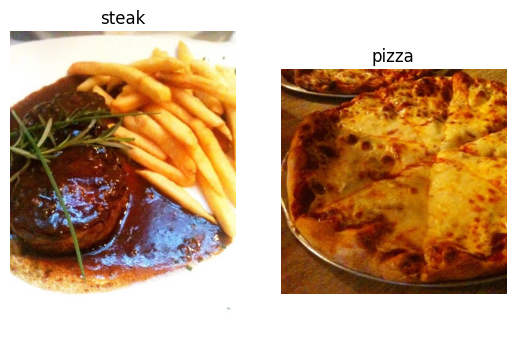

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
len(train_data)

47

In [25]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [30]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model



In [32]:
len(train_data), len(test_data)

(47, 16)

In [33]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 233ms/step - loss: 1.6361 - accuracy: 0.6440 - val_loss: 0.5333 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5017 - accuracy: 0.7573 - val_loss: 0.4512 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 18s 392ms/step - loss: 0.3962 - accuracy: 0.8333 - val_loss: 0.3846 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 16s 346ms/step - loss: 0.3009 - accuracy: 0.8813 - val_loss: 0.3529 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 15s 314ms/step - loss: 0.2185 - accuracy: 0.9253 - val_loss: 0.4452 - val_accuracy: 0.8000


### 5. Evaluating our model

<Axes: >

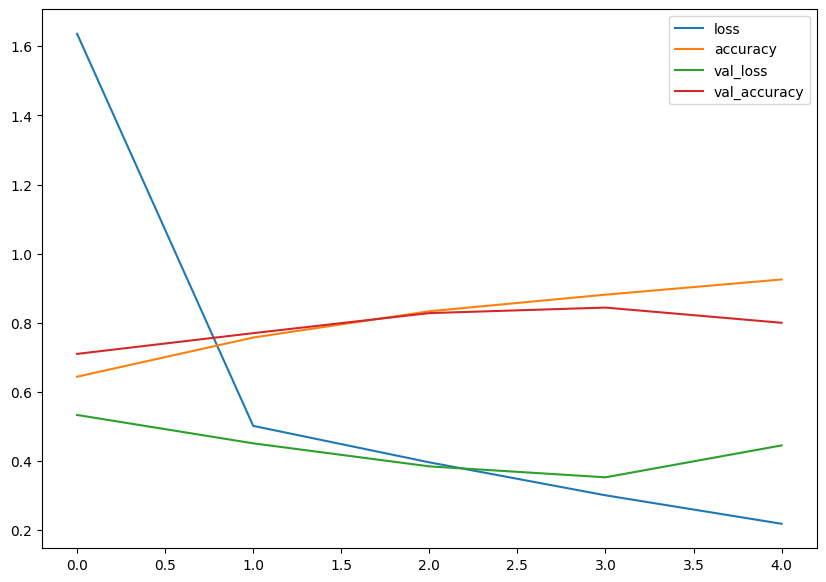

In [34]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [35]:
history_4.history["loss"]

[1.636142611503601,
 0.5017375349998474,
 0.3962084650993347,
 0.300856351852417,
 0.21847368776798248]

In [36]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

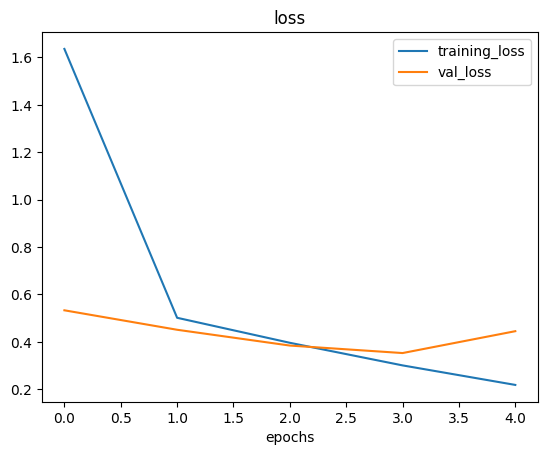

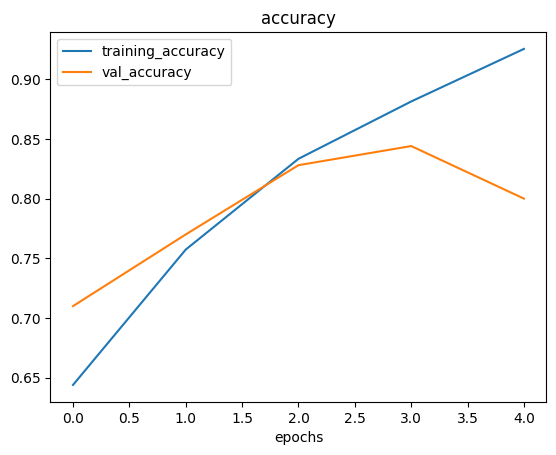

In [37]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [38]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 283ms/step - loss: 0.6045 - accuracy: 0.6767 - val_loss: 0.5050 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4877 - accuracy: 0.7773 - val_loss: 0.4295 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4498 - accuracy: 0.8047 - val_loss: 0.3752 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4223 - accuracy: 0.8227 - val_loss: 0.4011 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3922 - accuracy: 0.8380 - val_loss: 0.3221 - val_accuracy: 0.8620


In [41]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

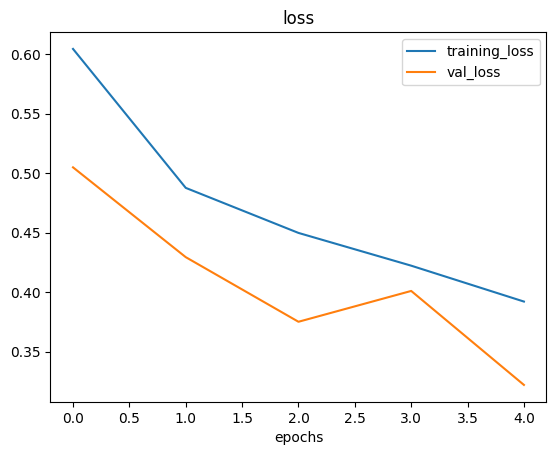

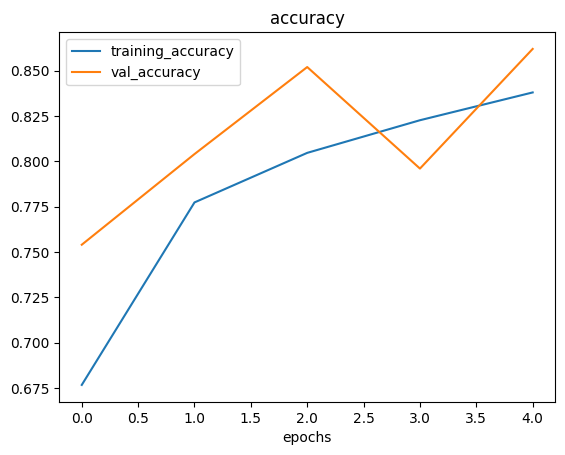

In [42]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [43]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [45]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 15


(-0.5, 223.5, 223.5, -0.5)

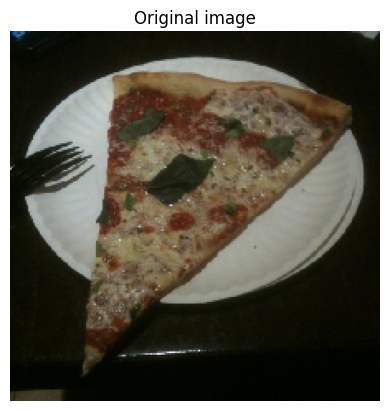

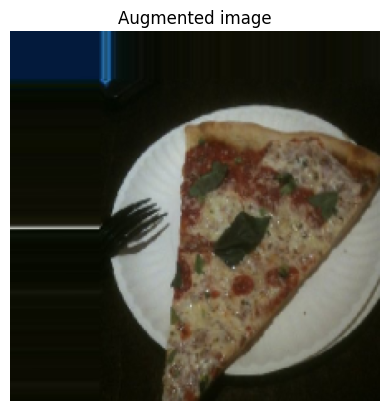

In [46]:
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [48]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 613ms/step - loss: 0.7054 - accuracy: 0.4453 - val_loss: 0.6836 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 30s 634ms/step - loss: 0.6797 - accuracy: 0.5573 - val_loss: 0.6686 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 26s 565ms/step - loss: 0.6959 - accuracy: 0.5953 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 28s 584ms/step - loss: 0.6957 - accuracy: 0.5113 - val_loss: 0.6882 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 42s 896ms/step - loss: 0.6822 - accuracy: 0.6207 - val_loss: 0.6595 - val_accuracy: 0.6400


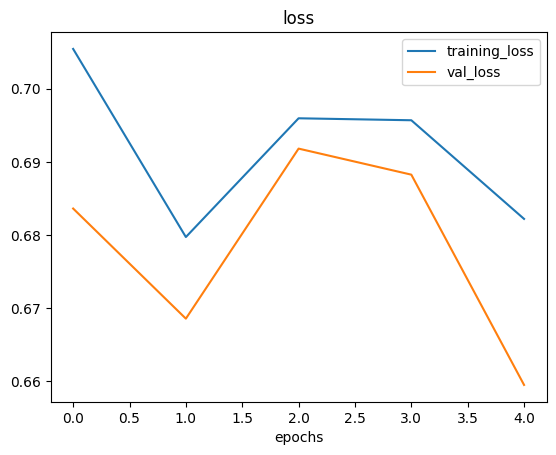

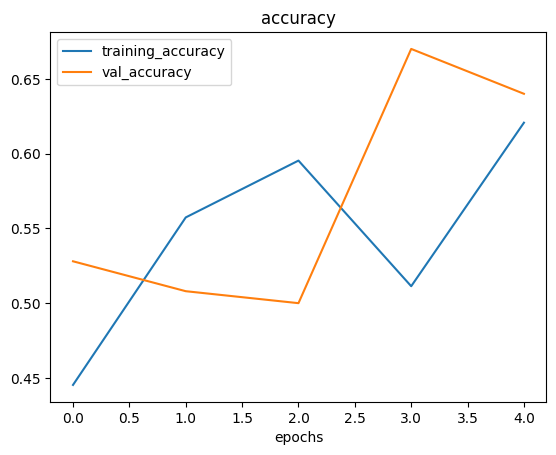

In [49]:
plot_loss_curves(history_6)

In [50]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [53]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 632ms/step - loss: 0.6515 - accuracy: 0.6113 - val_loss: 0.5802 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 24s 510ms/step - loss: 0.5573 - accuracy: 0.7153 - val_loss: 0.5379 - val_accuracy: 0.6720
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5238 - accuracy: 0.7373 - val_loss: 0.3710 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 24s 516ms/step - loss: 0.4841 - accuracy: 0.7727 - val_loss: 0.3562 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4808 - accuracy: 0.7793 - val_loss: 0.3524 - val_accuracy: 0.8560


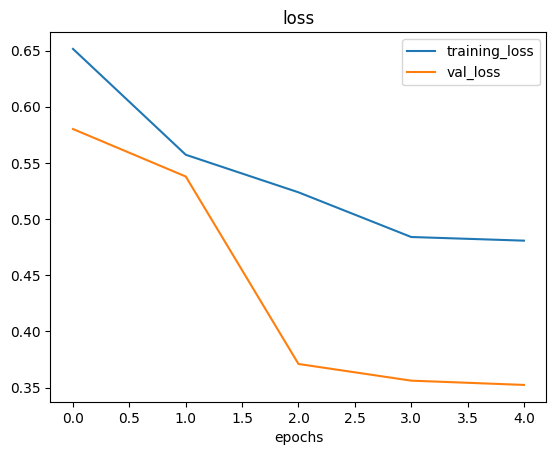

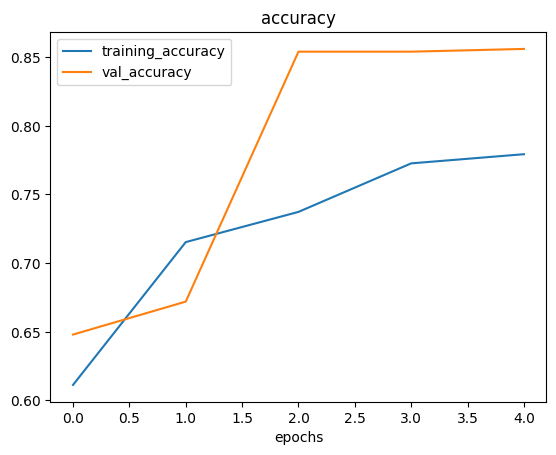

In [54]:
plot_loss_curves(history_7)